In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
pwd

'C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1'

In [117]:
df = pd.read_csv("C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\08-Linear-Regression-Models\\Advertising.csv")

In [118]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [119]:
df['total_sum'] = df['TV']+df['radio']+df['newspaper']

In [120]:
df.head()

,TV,radio,newspaper,sales,total_sum
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_sum', ylabel='sales'>

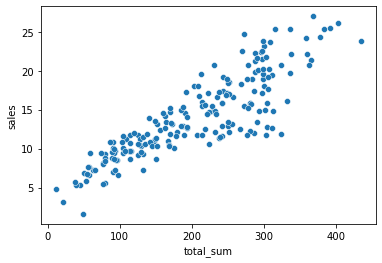

In [121]:
sns.scatterplot(data=df, x='total_sum', y='sales')

<AxesSubplot:xlabel='total_sum', ylabel='sales'>

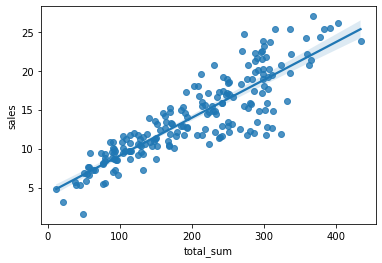

In [122]:
#лінійна регресія , метод найменших квадратів
sns.regplot(data=df, x='total_sum', y='sales')

In [123]:
X = df['total_sum']
y = df['sales']

In [124]:
# y=B1*x+B0
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [125]:
potential_spend = np.linspace(0,500,100)

In [126]:
predicted_sales = 0.04868788*potential_spend+4.24302822

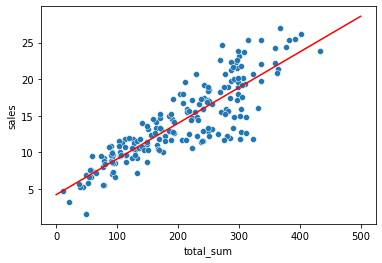

In [127]:
sns.scatterplot(data=df, x='total_sum', y='sales')
plt.plot(potential_spend, predicted_sales, color='r')

In [128]:
np.polyfit(X,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [129]:
pot_spend = np.linspace(0,500,100)

In [130]:
pred_sales = 3.07615033e-07*pot_spend**3 + (-1.89392449e-04)*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

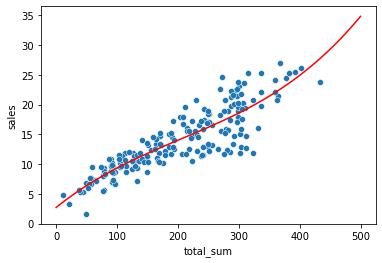

In [131]:
sns.scatterplot(data=df, x='total_sum', y='sales')
plt.plot(pot_spend, pred_sales, color='r')

In [132]:
df = pd.read_csv("C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\08-Linear-Regression-Models\\Advertising.csv")

In [133]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


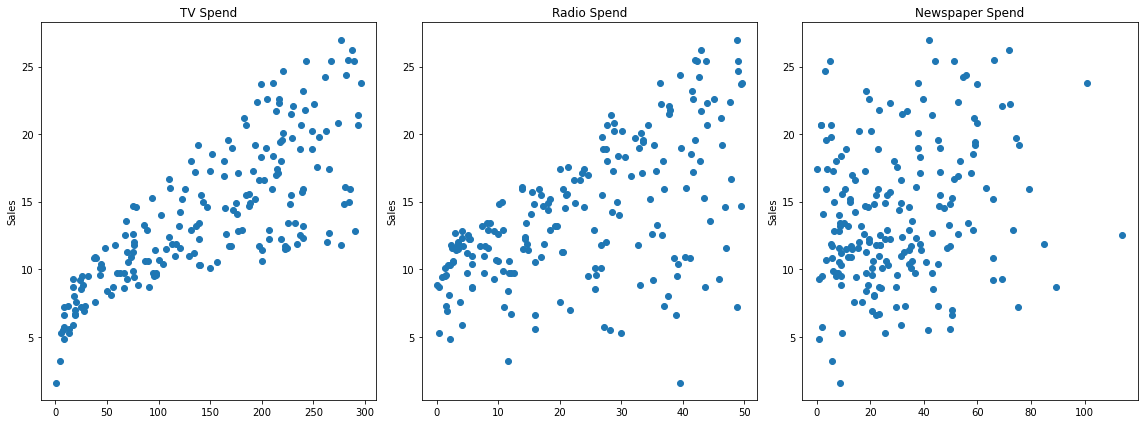

In [134]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

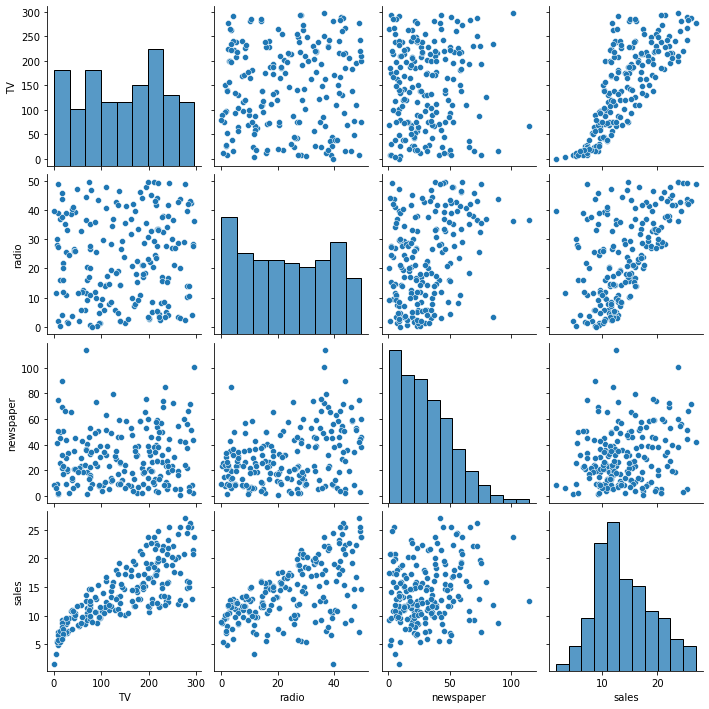

In [135]:
sns.pairplot(data=df)

In [136]:
X = df.drop('sales',axis=1)

In [137]:
y = df['sales']


In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
len(df)

200

In [141]:
len(X_train)

140

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
model = LinearRegression()

In [144]:
model.fit(X_train,y_train)

LinearRegression()

In [145]:
#результат моделі для тестового набора даних 
test_predictions = model.predict(X_test)
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [147]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

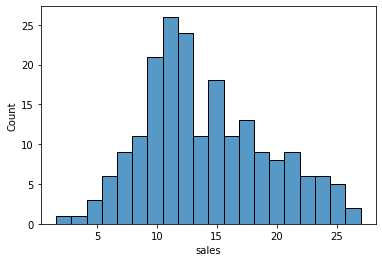

In [148]:
sns.histplot(data=df,x='sales', bins=20)

In [149]:
mean_absolute_error(y_test,test_predictions)

1.5116692224549084

In [150]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.9485372043446383

In [151]:
mean_squared_error(y_test,test_predictions)

3.7967972367152183

In [152]:
test_result = y_test- test_predictions

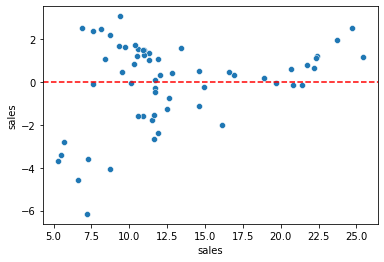

In [153]:
sns.scatterplot(x=y_test, y=test_result)
plt.axhline(y=0,color='r', ls='--')

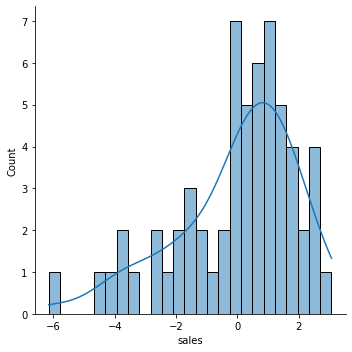

In [154]:
#проверка роспределения остатков
sns.displot(test_result, bins=25,kde=True)

In [155]:
import scipy as sp

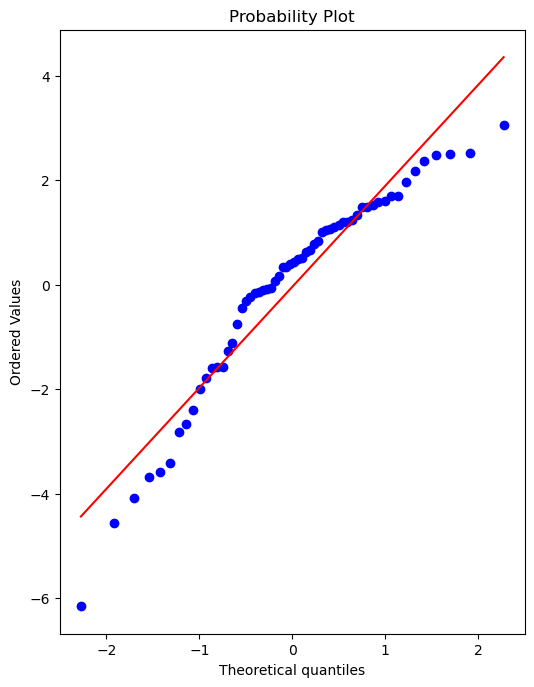

In [156]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_result,plot=ax)

In [157]:
final_model = LinearRegression()

In [158]:
final_model.fit(X,y)

LinearRegression()

In [159]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [160]:
y_hat = final_model.predict(X)

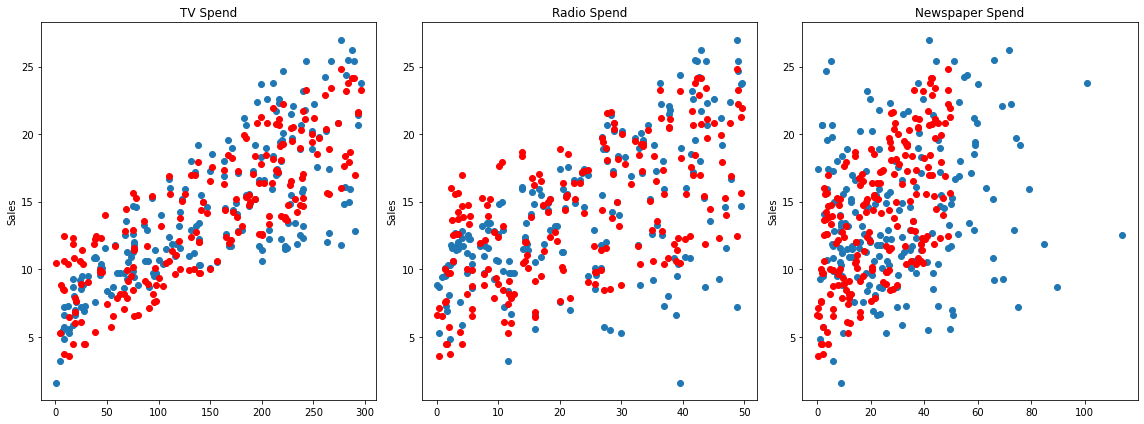

In [161]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [162]:
X.shape

(200, 3)

In [163]:
# для сохранения модели в файл для передачи её заказчику или в работу
from joblib import dump, load

In [164]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [165]:
#для загрузки на другом устройстве нужно присвоить переменной и загрузить нашу модель
loaded_model = load('final_sales_model.joblib')

In [166]:
X.shape

(200, 3)

In [167]:
#передадим новые данные нашей модели и проверим её работу
camp = [[149,22,12]]

In [168]:
loaded_model.predict(camp)

C:\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [169]:
X = df.drop('sales',axis=1)

In [170]:
y = df['sales']

Полиномиальная регресия

In [171]:
from sklearn.preprocessing import PolynomialFeatures

In [172]:
polyn_converter = PolynomialFeatures(degree = 2, include_bias=False)

In [173]:
polyn_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [174]:
polyn_converter.transform(X).shape


(200, 9)

In [175]:
#методи fit() and transform() можем заменить одной командой fit_transform()
polyn_features = polyn_converter.fit_transform(X)

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(polyn_features, y, test_size=0.3, random_state=42)

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
model = LinearRegression()

In [180]:
model.fit(X_train,y_train)

LinearRegression()

In [181]:
test_prediction = model.predict(X_test)

In [182]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [183]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [184]:
MAE = mean_absolute_error(y_test, test_prediction)

In [185]:
MSE = mean_squared_error(y_test, test_prediction)

In [186]:
RMSE = np.sqrt(MSE)

In [187]:
MAE

0.5905974833808008

In [188]:
RMSE

0.7233218473857531

In [81]:
# 1 Создать различные степени полинома
# 2 Разбить данные на обучающие и тестовые наборы данных
# 3 Обучить модель
# 4 Сохранить метрики RMSE для обучающего и тестового наборов данных
# 5 Нарисовать график с результатами - ошибка по степеням полинома

In [189]:
train_rmse_errors = []
test_rmse_errors = []

for d in  range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    

In [190]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838925,
 0.4688758111822086,
 0.36946897017715674,
 0.24382206827180572,
 0.19737747791436286,
 0.42552782227379454,
 0.15782447559939888,
 0.16640536093291597]

In [191]:
test_rmse_errors

[1.9485372043446383,
 0.7233218473857531,
 0.5392350985609965,
 1.3032265967218177,
 5.946670177318908,
 25.96451684336015,
 634.4709144546548,
 2697.781178413146,
 133221.04828871827]

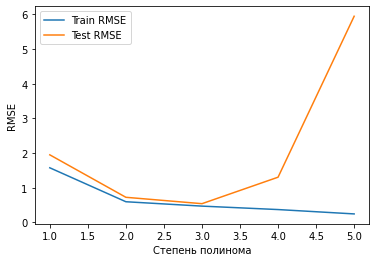

In [192]:
plt.plot(range(1,6),train_rmse_errors[:5], label='Train RMSE')
plt.plot(range(1,6),test_rmse_errors[:5], label='Test RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend();

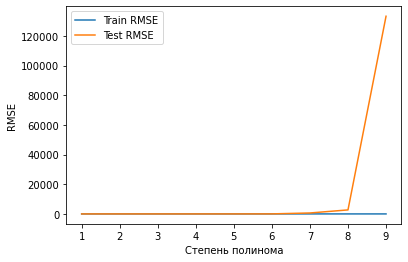

In [193]:
plt.plot(range(1,10),train_rmse_errors, label='Train RMSE')
plt.plot(range(1,10),test_rmse_errors, label='Test RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend();

In [194]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [195]:
final_model = LinearRegression()

In [196]:
full_converter_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converter_X,y)

LinearRegression()

In [197]:
from joblib import dump,load

In [198]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [199]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [200]:
# Кросс-валидация и маштабирование регуляризация- подготовка данных

In [201]:
from sklearn.preprocessing import PolynomialFeatures

In [202]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [203]:
poly_features = polynomial_converter.fit_transform(X)

In [204]:
poly_features.shape

(200, 19)

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()

In [209]:
scaler.fit(X_train)

StandardScaler()

In [210]:
X_train = scaler.transform(X_train)

In [211]:
X_test = scaler.transform(X_test)

In [212]:
X_train[0]

array([ 1.53003874, -0.8862929 , -1.16598019,  1.93705409, -0.22476356,
       -0.62651363, -0.90793157, -0.850692  , -0.81317305,  2.23096225,
        0.10749852, -0.35876444, -0.61820397, -0.60530328, -0.5751799 ,
       -0.81381745, -0.72447935, -0.64260728, -0.56741817])

In [213]:
from sklearn.linear_model import Ridge

In [214]:
ridge_model = Ridge(alpha=10)

In [215]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [216]:
test_prediction = ridge_model.predict(X_test)

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [218]:
MAE = mean_absolute_error(y_test, test_prediction)

In [219]:
MAE

0.6296591346758601

In [220]:
MSE = mean_squared_error(y_test, test_prediction)

In [221]:
RMSE = np.sqrt(MSE)

In [222]:
RMSE

0.8916327541710896

In [223]:
from sklearn.linear_model import RidgeCV

In [224]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

In [225]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [226]:
ridge_cv_model.alpha_

0.1

In [227]:
from sklearn.metrics import SCORERS

In [228]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [229]:
test_prediction = ridge_cv_model.predict(X_test)

In [230]:
MAE = mean_absolute_error(y_test, test_prediction)

In [231]:
MAE

0.46671241132084407

In [232]:
RSME = np.sqrt(mean_squared_error(y_test, test_prediction))

In [233]:
RSME

0.5945136671856113

In [234]:
ridge_cv_model.coef_

array([ 5.90523815,  0.46316396,  0.68028713, -6.17743395,  3.73671928,
       -1.40708382,  0.00624704,  0.11128917, -0.2617823 ,  2.17135744,
       -0.51480159,  0.70587211,  0.60311504, -0.53271216,  0.5716495 ,
       -0.34685826,  0.36744388, -0.03938079, -0.12192939])

In [235]:
ridge_cv_model.best_score_

-0.39775602916815345

LASSO - least absolute shrinkage and selection operator

In [236]:
from sklearn.linear_model import LassoCV

In [237]:
#model_lasso_cv = LassoCV(eps=0.1, n_alphas=100, cv=5)
model_lasso_cv = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=1000000)

In [238]:
model_lasso_cv.fit(X_train,y_train)

LassoCV(cv=5, max_iter=1000000)

In [239]:
model_lasso_cv.alpha_

0.0049245318064748715

In [240]:
test_predictions = model_lasso_cv.predict(X_test)

In [241]:
MAE = mean_absolute_error(y_test, test_predictions)

In [242]:
MAE

0.5123045552899823

In [243]:
RSME = np.sqrt(mean_squared_error(y_test, test_predictions))

In [244]:
RMSE

0.8916327541710896

In [245]:
model_lasso_cv.coef_

array([ 5.15048089,  0.4274257 ,  0.29684446, -4.53337994,  3.38937185,
       -0.4288993 ,  0.        ,  0.        ,  0.        ,  1.17891049,
       -0.        ,  0.        ,  0.16706037, -0.        ,  0.        ,
        0.        ,  0.11083672,  0.        ,  0.06155549])

In [246]:
from sklearn.linear_model import ElasticNetCV

In [247]:
model_elasticnet_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],eps=0.001, n_alphas=100, max_iter=1000000)

In [248]:
model_elasticnet_cv.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [249]:
model_elasticnet_cv.alpha_

0.0049245318064748715

In [250]:
model_elasticnet_cv.l1_ratio_

1.0

In [251]:
test_prediction = model_elasticnet_cv.predict(X_test)

In [252]:
MAE = mean_absolute_error(y_test, test_prediction)

In [253]:
MAE

0.5123045552899823

In [254]:
RMSE = np.sqrt(mean_squared_error(y_test,test_prediction))

In [255]:
RSME

0.6308043049172876

Выбросы

In [256]:
# Указываем среднее значение, среднеквадратическое отклонение и количество сэмплов

def create_ages(mu=50,sigma=13,num_samples=100,seed=42):

    # Указываем значение random seed в той же ячейке, что и вызов метода random - 
    # это нужно для того, чтобы получить те же самые данные
    # Мы используем значение 42 (42 это число из комедийного сериала Автостопом по Галактике - 
    # Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    
    return sample_ages

In [257]:
sample = create_ages()

In [258]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

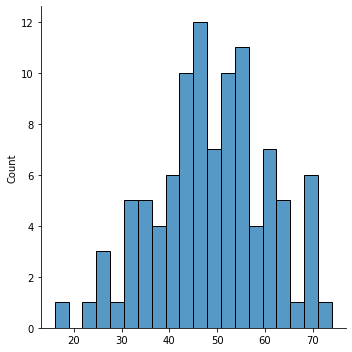

In [259]:
sns.displot(sample, bins=20)

<AxesSubplot:>

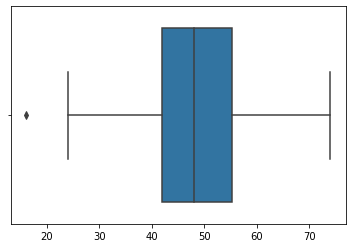

In [260]:
sns.boxplot(x=sample)

In [261]:
ser = pd.Series(sample)

In [262]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [263]:
IQR = 55.25000 - 42.00000
lower_limit = 42.00000 - 1.5*IQR
lower_limit

22.125

In [264]:
# drop outliers
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [265]:
q75,q25 = np.percentile(sample,[75,25])

In [266]:
q25

42.0

In [267]:
q25 - 1.5*(q75-q25)

22.125

In [268]:
df = pd.read_csv('C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\DATA\\Ames_Housing_Data.csv')

In [269]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [271]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

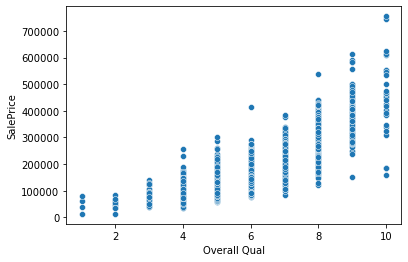

In [272]:
sns.scatterplot(x='Overall Qual', y='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

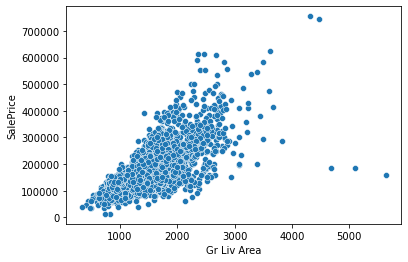

In [273]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice',data=df)

In [274]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [275]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [276]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index

In [277]:
df = df.drop(drop_ind,axis = 0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

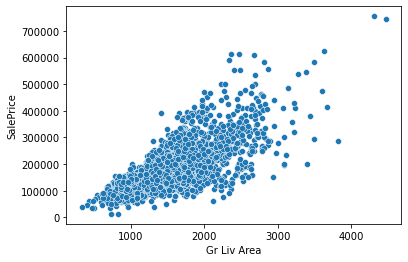

In [278]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice',data=df)

In [279]:
#save in file  df.to_csv('filename.csv')

In [280]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [281]:
df = df.drop('PID', axis = 1)

In [282]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [283]:
100*df.isnull().sum()/len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [284]:
def percent_missing(my_df):
    result = 100*my_df.isnull().sum()/len(df)
    result = result[result>0].sort_values()
    return result

In [285]:
percent_nan = percent_missing(df)

In [286]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

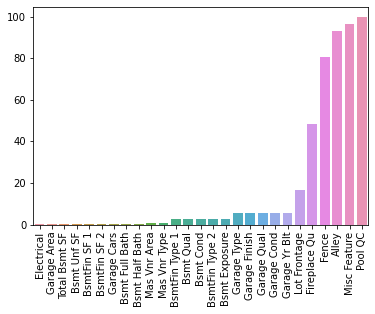

In [287]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90);

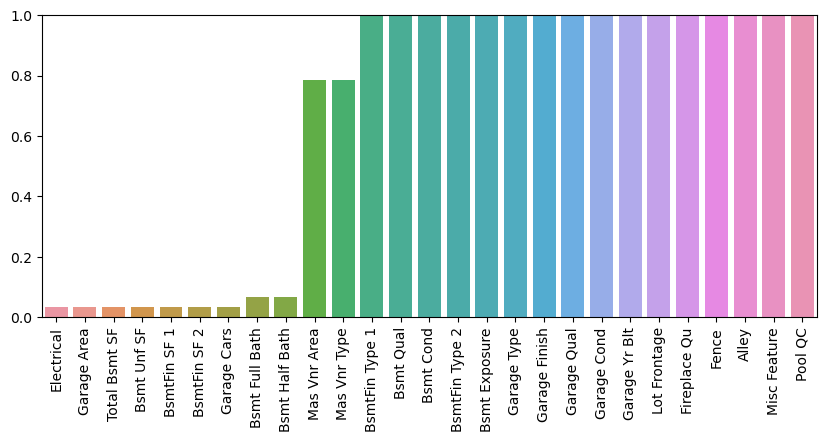

In [288]:
plt.figure(figsize = (10,4),dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1);

In [289]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [290]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [291]:
df[df['Electrical'].isnull()]['Garage Area']

1577    400.0
Name: Garage Area, dtype: float64

In [292]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [293]:
df = df.dropna(axis = 0, subset=['Electrical','Garage Area'])

In [294]:
percent_nan = percent_missing(df)

In [295]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

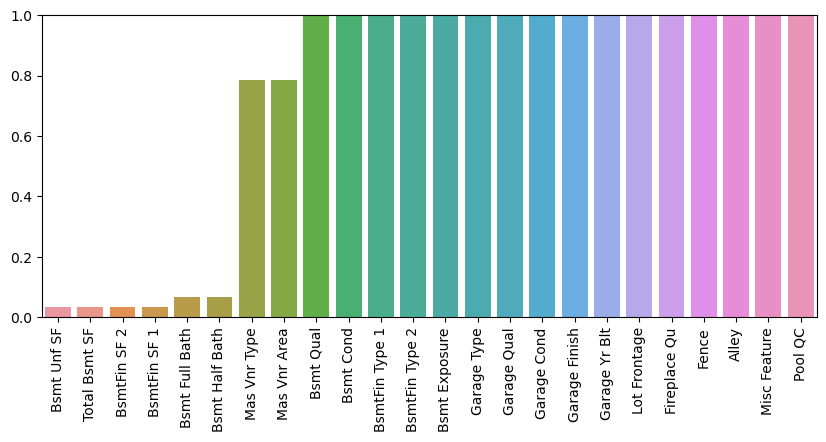

In [296]:
plt.figure(figsize = (10,4),dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1);

In [297]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [298]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [299]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [300]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [301]:
#для текстовых значений
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [302]:
percent_nan = percent_missing(df)

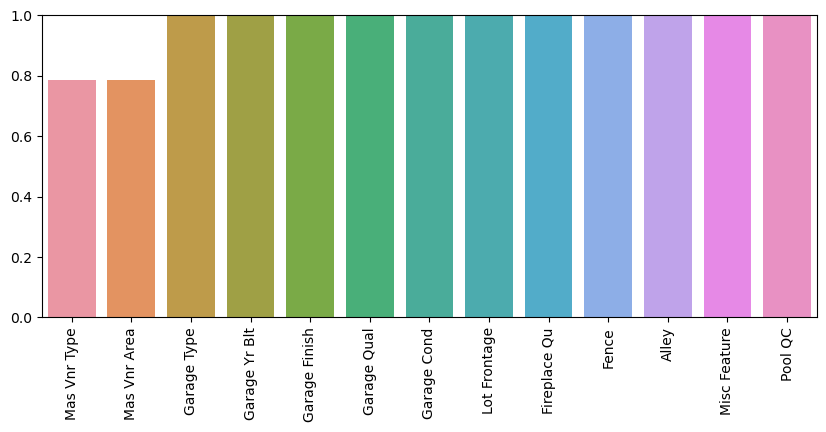

In [303]:
plt.figure(figsize = (10,4),dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1);

In [304]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [305]:
percent_nan = percent_missing(df)

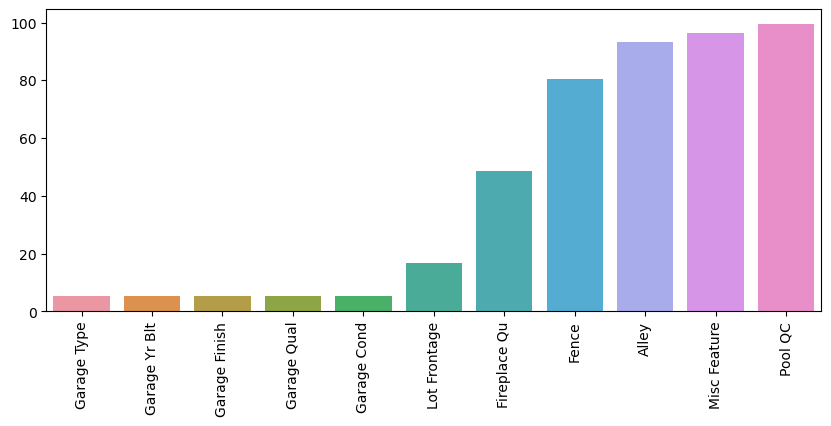

In [306]:
plt.figure(figsize = (10,4),dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90);


In [307]:
grj_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [308]:
df[grj_str_cols] = df[grj_str_cols].fillna('None')

In [309]:
percent_nan = percent_missing(df)

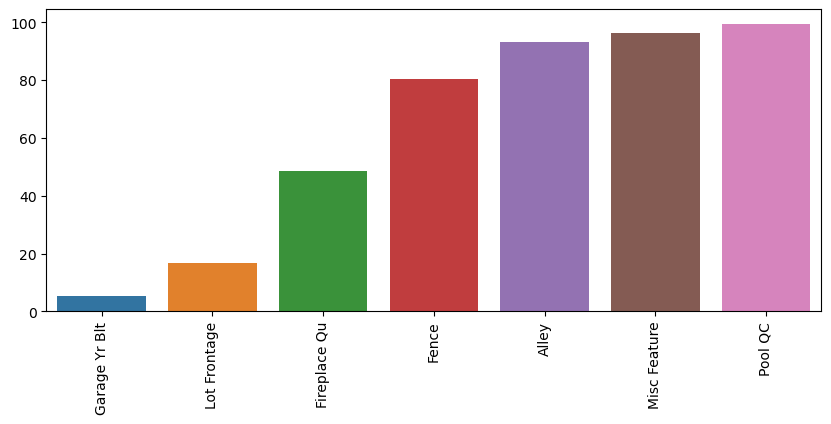

In [310]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [311]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [312]:
percent_nan = percent_missing(df)

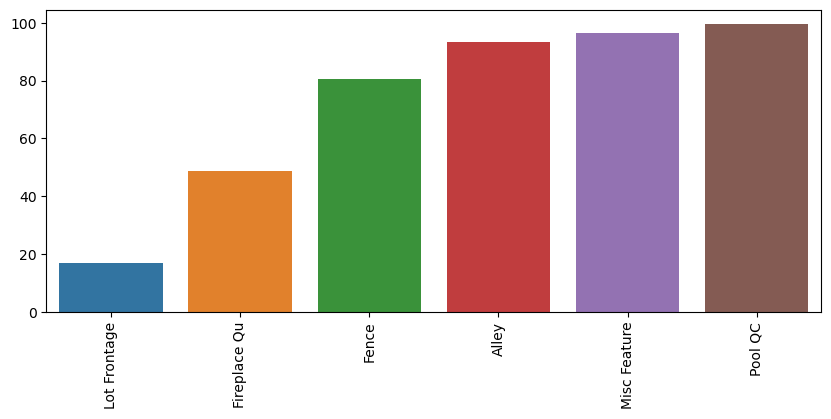

In [313]:
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [314]:
df = df.drop(['Pool QC','Misc Feature', 'Alley', 'Fence'],axis=1)

In [315]:
percent_nan = percent_missing(df)

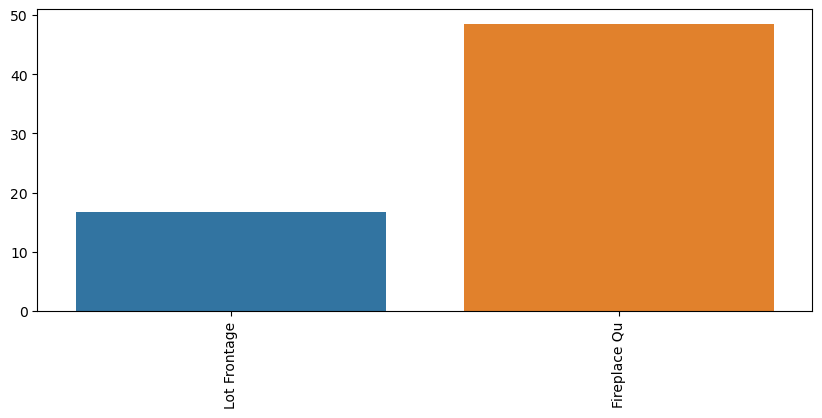

In [316]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [317]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [318]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [319]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [320]:
df['Lot Frontage'] =  df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [321]:
df['Lot Frontage'].isnull().sum()

3

In [322]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [323]:
df['Lot Frontage'].isnull().sum()

0

In [324]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [325]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [326]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [327]:
my_object_df = df.select_dtypes(include='object')

In [328]:
my_num_df = df.select_dtypes(exclude='object')

In [329]:
df_objects_dummies = pd.get_dummies(my_object_df,drop_first=True)

In [330]:
df_objects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [331]:
df_final = pd.concat([my_num_df,df_objects_dummies],axis=1)

In [332]:
df_final

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [285]:
df_final.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

Кросс-валидация 

In [2]:
df_1 = pd.read_csv("C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
df_1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df_1.drop('sales',axis=1)

In [5]:
y = df_1['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import Ridge

In [17]:
model = Ridge(alpha=100)

In [18]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mean_absolute_error(y_test,y_pred)

2.1469875077188436

In [24]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

2.8082558006663842

In [25]:
model_two = Ridge(alpha=1)

In [26]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [27]:
y_pred_two = model_two.predict(X_test)

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred_two))
RMSE

1.949405680710796

#

Train -Validation - Test Split (hold_out)

In [29]:
df_2 = pd.read_csv("C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\08-Linear-Regression-Models\\Advertising.csv")

In [30]:
df_2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
X = df_2.drop('sales', axis=1)

In [32]:
y = df_2['sales']

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_other, y_train, y_other = train_test_split(X,y, test_size=0.3, random_state=42)

In [36]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other,y_other, test_size=0.5,random_state=42)

In [40]:
len(X_train)

140

In [41]:
len(X_eval)

30

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)

StandardScaler()

In [45]:
X_train = scaler.transform(X_train)

In [46]:
X_eval = scaler.transform(X_eval)

In [47]:
X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import Ridge

In [49]:
model = Ridge(alpha=100)

In [52]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [53]:
y_eval_pred = model.predict(X_eval)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
RMSE = np.sqrt(mean_squared_error(y_eval,y_eval_pred))
RMSE

2.622394638051209

In [56]:
model_two = Ridge(alpha=1)

In [57]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [58]:
y_eval_pred_two = model_two.predict(X_eval)

In [59]:
from sklearn.metrics import mean_squared_error

In [61]:
RMSE = np.sqrt(mean_squared_error(y_eval,y_eval_pred_two))
RMSE

1.597563935854712

In [64]:
y_final = model_two.predict(X_test)

In [65]:
RMSE = np.sqrt(mean_squared_error(y_test,y_final))
RMSE

2.2468098466117343

Кросс-валидация

In [68]:
df_two = pd.read_csv("C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\08-Linear-Regression-Models\\Advertising.csv")

In [69]:
X = df_two.drop('sales',axis=1)

In [70]:
y = df_two['sales']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X_train)

StandardScaler()

In [76]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.linear_model import Ridge

In [78]:
model = Ridge(alpha=100)

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [81]:
scores

array([-6.82773615, -6.93824123, -8.87314549, -8.09875208, -8.11849919])

In [82]:
abs(scores.mean())

7.7712748271872725

In [83]:
model_two = Ridge(alpha=1)

In [84]:
scores = cross_val_score(model_two, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-2.7770397 , -1.58940786, -2.4419187 , -2.20085707, -4.85562156])

In [85]:
abs(scores.mean())

2.772968978937122

In [86]:
model_two.fit(X_train,y_train)

Ridge(alpha=1)

In [87]:
y_final_test_pred = model_two.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
mean_squared_error(y_test, y_final_test_pred)

3.800182507987522

# Cross-validation

In [90]:
df_2 = pd.read_csv("C:\\Users\\Лара\\Desktop\\ML\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\\08-Linear-Regression-Models\\Advertising.csv")

In [92]:
X = df_2.drop('sales',axis=1)
y = df_2['sales']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
from sklearn.model_selection import cross_validate

In [96]:
model = Ridge(alpha=100)

In [98]:
scores = cross_validate(model,X_train,y_train, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], cv=10)

In [99]:
scores

{'fit_time': array([0.00957251, 0.00399065, 0.00475335, 0.004035  , 0.00595737,
        0.00497746, 0.00399256, 0.00599504, 0.00303769, 0.00293875]),
 'score_time': array([0.008214  , 0.00351095, 0.00299096, 0.00299191, 0.00404119,
        0.00413394, 0.00199461, 0.00257635, 0.00303149, 0.00205326]),
 'test_neg_mean_squared_error': array([ -6.06067062, -10.62703078,  -3.99342608,  -5.00949402,
         -9.14179955, -13.08625636,  -3.83940454,  -9.05878567,
         -9.05545685,  -5.77888211]),
 'test_neg_mean_absolute_error': array([-1.8102116 , -2.54195751, -1.46959386, -1.86276886, -2.52069737,
        -2.45999491, -1.45197069, -2.37739501, -2.44334397, -1.89979708])}

In [100]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.009573,0.008214,-6.060671,-1.810212
1,0.003991,0.003511,-10.627031,-2.541958
2,0.004753,0.002991,-3.993426,-1.469594
3,0.004035,0.002992,-5.009494,-1.862769
4,0.005957,0.004041,-9.141800,-2.520697
5,0.004977,0.004134,-13.086256,-2.459995
6,0.003993,0.001995,-3.839405,-1.451971
7,0.005995,0.002576,-9.058786,-2.377395
8,0.003038,0.003031,-9.055457,-2.443344
9,0.002939,0.002053,-5.778882,-1.899797


In [102]:
scores.mean()

fit_time                        0.004925
score_time                      0.003554
test_neg_mean_squared_error    -7.565121
test_neg_mean_absolute_error   -2.083773
dtype: float64

In [103]:
model = Ridge(alpha=1)

In [104]:
scores = cross_validate(model,X_train,y_train, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], cv=10)
scores

{'fit_time': array([0.00694466, 0.00399089, 0.0050025 , 0.00502753, 0.00299644,
        0.00302196, 0.00332642, 0.0029912 , 0.00403476, 0.00294828]),
 'score_time': array([0.00204206, 0.00332212, 0.00380206, 0.00299788, 0.00199318,
        0.00299954, 0.00166106, 0.00289512, 0.00199485, 0.00302744]),
 'test_neg_mean_squared_error': array([-2.96250773, -3.05737833, -2.1737403 , -0.83303438, -3.46401792,
        -8.2326467 , -1.90586431, -2.76504844, -4.98950515, -2.84643818]),
 'test_neg_mean_absolute_error': array([-1.45717399, -1.5553078 , -1.23877012, -0.76893775, -1.43448944,
        -1.4943158 , -1.08136203, -1.25001123, -1.58097132, -1.22332553])}

In [105]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.006945,0.002042,-2.962508,-1.457174
1,0.003991,0.003322,-3.057378,-1.555308
2,0.005002,0.003802,-2.173740,-1.238770
3,0.005028,0.002998,-0.833034,-0.768938
4,0.002996,0.001993,-3.464018,-1.434489
5,0.003022,0.003000,-8.232647,-1.494316
6,0.003326,0.001661,-1.905864,-1.081362
7,0.002991,0.002895,-2.765048,-1.250011
8,0.004035,0.001995,-4.989505,-1.580971
9,0.002948,0.003027,-2.846438,-1.223326


In [106]:
scores.mean()

fit_time                        0.004028
score_time                      0.002674
test_neg_mean_squared_error    -3.323018
test_neg_mean_absolute_error   -1.308467
dtype: float64

In [107]:
model = Ridge(alpha=0.1)

In [108]:
scores = cross_validate(model,X_train,y_train, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], cv=10)
scores

{'fit_time': array([0.00461483, 0.00355768, 0.00514245, 0.00288582, 0.00494838,
        0.00191188, 0.00299358, 0.00317264, 0.00090837, 0.00199389]),
 'score_time': array([0.00298882, 0.00342345, 0.00283456, 0.00199509, 0.00199413,
        0.00199389, 0.00199366, 0.00081563, 0.00199533, 0.00099659]),
 'test_neg_mean_squared_error': array([-2.97549169, -3.02345717, -2.21737608, -0.84369927, -3.43333928,
        -8.21561689, -1.94260309, -2.76140232, -4.96510913, -2.8426761 ]),
 'test_neg_mean_absolute_error': array([-1.45635146, -1.55334403, -1.24563999, -0.76163212, -1.41931076,
        -1.48706756, -1.09602224, -1.25822701, -1.57677256, -1.2238763 ])}

In [109]:
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.004615,0.002989,-2.975492,-1.456351
1,0.003558,0.003423,-3.023457,-1.553344
2,0.005142,0.002835,-2.217376,-1.245640
3,0.002886,0.001995,-0.843699,-0.761632
4,0.004948,0.001994,-3.433339,-1.419311
5,0.001912,0.001994,-8.215617,-1.487068
6,0.002994,0.001994,-1.942603,-1.096022
7,0.003173,0.000816,-2.761402,-1.258227
8,0.000908,0.001995,-4.965109,-1.576773
9,0.001994,0.000997,-2.842676,-1.223876


In [110]:
scores.mean()

fit_time                        0.003213
score_time                      0.002103
test_neg_mean_squared_error    -3.322077
test_neg_mean_absolute_error   -1.307824
dtype: float64

In [111]:
model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [112]:
y_final_pred = model.predict(X_test)

In [113]:
mean_squared_error(y_test,y_final_pred)

2.300652700356322

# final проект по линейная регрессия

In [345]:
df_final.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [346]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [347]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [348]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [349]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
param_grid = {'alpha':[0.1,20,25,50,100], 'l1_ratio':[0.1, .5, .9, .95, .99, 1]}

In [351]:
from sklearn.model_selection import GridSearchCV


grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

In [352]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.986e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.9; total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.235e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.369e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.575e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.887e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.928e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.542e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.635e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.5s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.071e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.553e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.066e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.028e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.687e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=20, l1_ratio=1; total time=   0.3s
[CV] END .............................alpha=25, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=25, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.453e+09, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=25, l1_ratio=1; total time=   0.3s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.794e+09, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=25, l1_ratio=1; total time=   0.4s
[CV] END ...............................alpha=25, l1_ratio=1; total time=   0.4s


C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=25, l1_ratio=1; total time=   0.3s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 20, 25, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [353]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [354]:
y_pred = grid_model.predict(X_test)

In [355]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [356]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

14195.354900562168

In [357]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

20558.508566893164

In [359]:
np.mean(df_final['SalePrice'])

180815.53743589742